<a href="https://colab.research.google.com/github/JS0501/ESAA_YB3/blob/main/%EC%A0%84%EB%A0%A5_%EC%82%AC%EC%9A%A9%EB%9F%89_%EC%98%88%EC%B8%A1_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C_%EC%88%98%EC%83%81%EC%9E%91_%EB%A6%AC%EB%B7%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://dacon.io/competitions/official/235736/codeshare/2877?page=1&dtype=recent

##### 1. 주제 및 데이터

**주제**

<건물 정보와 기후 정보를 활용한 전력 사용량 예측>

목표 1) 전력 수요 예측 시뮬레이션을 통한 효율적인 인공지능 알고리즘 발굴

목표 2) 전력 융합 신서비스 발굴 및 비즈니스 모델 개발 활용

목표 3) 디지털 뉴딜의 성공을 위한 인공지능(AI)의 융합, 확산을 촉진




**데이터**

- train.csv: 60개 건물들의 2020년 6월 1일 부터 2020년 8월 24일까지의 데이터,
1시간 단위로 제공,
전력사용량(kWh) 포함

- test.csv: 60개 건물들의 2020년 8월 25일 부터 2020년 8월 31일까지의 데이터,
3시간 단위로 제공(강수량의 경우 6시간 단위로 제공, 예보데이터),
전력사용량(kWh) **미포함**

- sample_submission.csv


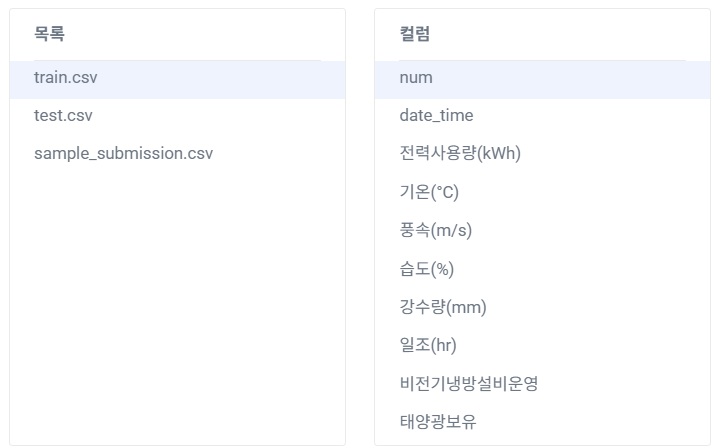

##### 2. 코드 분석

##### **고려 사항 1)**
건물별 모델링 or 전체 데이터에 대한 모델링

전체 데이터에 대한 모델링 시도 후 성능이 좋지 않아 건물별 모델링을 하였고, 큰 향상이 있었음

##### **고려 사항 2)**
전력 사용량 모델은 과소 추정보다는 과대 추정이 합리적일 것
(평가 지표가 SMAPE이기 때문)
-> 과소추정에 대해 높은 가중치를 부여하는 custom loss function 정의

##### **고려 사항 3)**
전처리

time series를 regression 문제로 변환하기 위해 시간 관련 변수 (월/주/요일) 추가

전력 소비량의 건물별 요일별 시간대별 평균 등 파생 변수 추가

시간은 cyclical encoding하여 변수 추가(sin time, cos time)후 삭제

##### **고려 사항 4)**
전처리 보단 **후처리**

고려 사항 2의 연장으로 모델 예측 중 비합리적으로 과소추정하는 경우를 보정하기 위한 후처리 진행
(ex. train set의 마지막 28일 데이터에 대해 각 건물별로 요일별 시간대별 최솟값과 예측값을 비교하여 만약 예측값이 더 작다면 최솟값으로 대체)

##### **고려 사항 5)**

시계열 모델에 좋은 성능을 보이는 XGBoost 사용

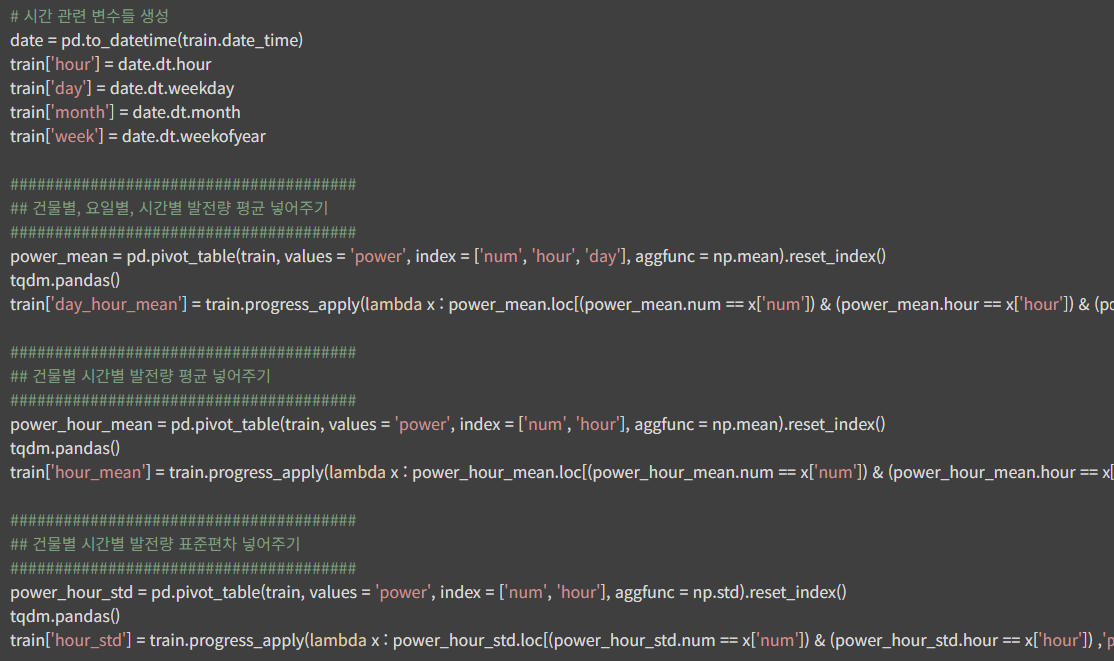

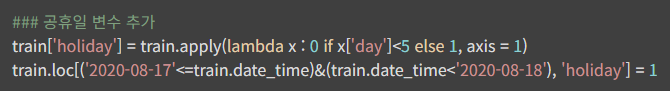

##### 3. 차별점 및 배울점

- 모델 성능 향상 방안을 고려할 때 평가 방법을 기반으로 합리적인 모델 구현


#### **1) 평가 지표인 SMAPE가 과소 추정에 높은 가중치를 부여하는 이유**
분자는 오차의 절댓값이라 과대·과소가 대칭이지만,

분모가
가 클수록(=과대추정) 같은 오차라도 값이 더 작아짐.

반대로
𝑦
^
y
^가 작을수록(=과소추정) 분모가 작아져 SMAPE가 더 커짐.

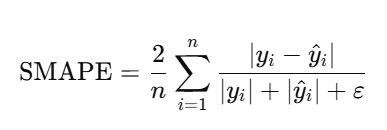

#### **2)과소 추정에 더 벌점을 주는 custom loss function**
##### **가중 SMAPE (Weighted SMAPE)**

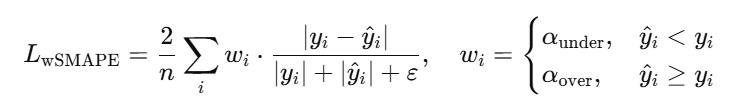

장점: 평가 지표(SMAPE)와 모양이 유사, 직접적으로 목표에 정렬.

주의:
𝑦
^
y
^
를 키우면 분모가 커져 손실이 더 줄 수 있어 지나친 과대추정으로 발산하지 않게 규제(가중치, 정규화, 클리핑)가 필요.

##### **핀볼(Quantile) 로스**
- 과대추정 유도에 가장 간단하고 안정적인 loss function

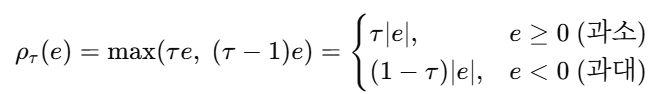

장점: 매끄럽고 수렴이 안정적, 발산 위험 작음, 구현 쉬움.

기타 고려 사항: 전력은 배수적 스케일 왜곡이 많으므로 log-스케일에서 핀볼을 쓰면 “상대오차”에 가까운 성질을 얻음.